## An exercise on bias in word embeddings.

We'll see how to use word embeddings and how they capture both helpful and biased associations.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import gensim.downloader
# show all available models
print('\n'.join(gensim.downloader.info()['models'].keys()))

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [31]:
#word2vec_model = gensim.downloader.load('glove-twitter-25')
word2vec_model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [32]:
# show some of the model's vocabulary. Note the twitter-isms, some of which came from the special tokenizer used for this model.
print(', '.join(word2vec_model.index_to_key[:100]))

the, ,, ., of, to, and, in, a, ", 's, for, -, that, on, is, was, said, with, he, as, it, by, at, (, ), from, his, '', ``, an, be, has, are, have, but, were, not, this, who, they, had, i, which, will, their, :, or, its, one, after, new, been, also, we, would, two, more, ', first, about, up, when, year, there, all, --, out, she, other, people, n't, her, percent, than, over, into, last, some, government, time, $, you, years, if, no, world, can, three, do, ;, president, only, state, million, could, us, most, _, against, u.s.


What is the dimensionality of the vectors in the word embedding matrix?

In [33]:
word2vec_model.vector_size

50

In [34]:
# show the model's vector for a word
print(word2vec_model['cat'])
print(word2vec_model['cat'].shape)

[ 0.45281  -0.50108  -0.53714  -0.015697  0.22191   0.54602  -0.67301
 -0.6891    0.63493  -0.19726   0.33685   0.7735    0.90094   0.38488
  0.38367   0.2657   -0.08057   0.61089  -1.2894   -0.22313  -0.61578
  0.21697   0.35614   0.44499   0.60885  -1.1633   -1.1579    0.36118
  0.10466  -0.78325   1.4352    0.18629  -0.26112   0.83275  -0.23123
  0.32481   0.14485  -0.44552   0.33497  -0.95946  -0.097479  0.48138
 -0.43352   0.69455   0.91043  -0.28173   0.41637  -1.2609    0.71278
  0.23782 ]
(50,)


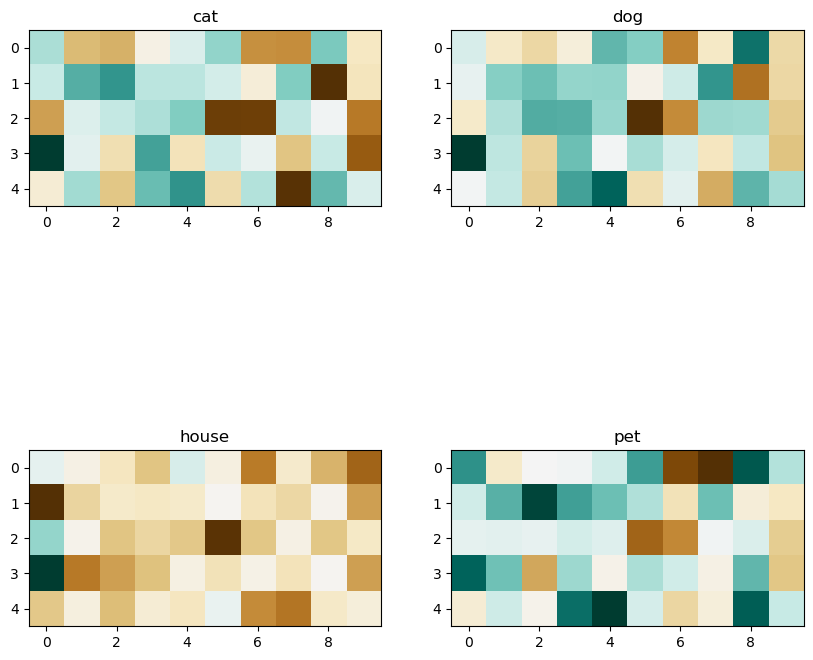

In [45]:
# show the model's vector for several words side by side as heatmaps
def show_heatmap(word, ax, vec=None, cmap='BrBG'):
    if vec is None:
        vec = word2vec_model[word]
    ax.imshow(vec.reshape(5, -1), cmap=cmap)
    ax.set_title(word)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# cat:
show_heatmap('cat', axs[0, 0])
# dog: 
show_heatmap('dog', axs[0, 1])
# house
show_heatmap('house', axs[1, 0])
# pet
show_heatmap('pet', axs[1, 1])

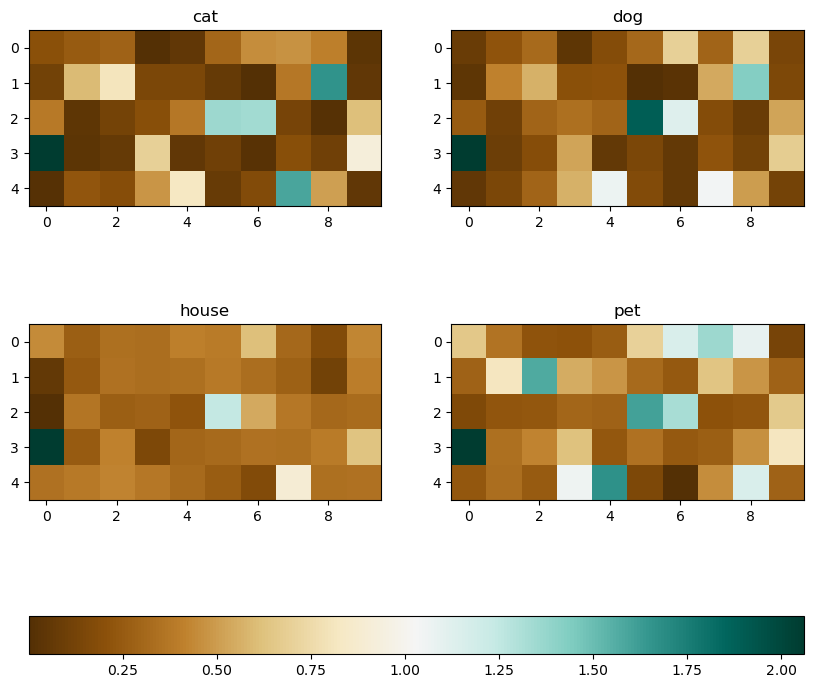

In [46]:
# show dot products, component by component, for each vector with "cat"
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# cat: (use a diverging colormap to show positive and negative values)
show_heatmap('cat', axs[0, 0], word2vec_model['cat'] * word2vec_model['cat'], cmap='BrBG')
# dog: 
show_heatmap('dog', axs[0, 1], word2vec_model['cat'] * word2vec_model['dog'], cmap='BrBG')
# house
show_heatmap('house', axs[1, 0], word2vec_model['cat'] * word2vec_model['house'], cmap='BrBG')
# pet
show_heatmap('pet', axs[1, 1], word2vec_model['cat'] * word2vec_model['pet'], cmap='BrBG')
# show color legend
fig.colorbar(axs[0, 0].images[0], ax=axs.ravel().tolist(), orientation='horizontal')

In [48]:
# Show the dot products of "cat" with "cat", "dog", "house", and "pet".
# Note that "cat" and "dog" are similar, but "cat" and "house" are not.
for word in ['cat', 'dog', 'house', 'pet']:
    print(f'{word:5s}: {np.dot(word2vec_model["cat"], word2vec_model[word]):.2f}')

cat  : 19.43
dog  : 19.74
house: 6.94
pet  : 16.15


In [49]:
# Now normalize the vectors first
cat_normalized = word2vec_model['cat'] / np.linalg.norm(word2vec_model['cat'])
for word in ['cat', 'dog', 'house', 'pet']:
    normalized_vec = word2vec_model[word] / np.linalg.norm(word2vec_model[word])
    print(f'{word:5s}: {np.dot(cat_normalized, normalized_vec):.2f}')

cat  : 1.00
dog  : 0.92
house: 0.31
pet  : 0.78


## Directions are meaningful

Adjective, comparative, superlative.


In [59]:
word2vec_model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

[('queen', 0.9288908839225769),
 ('throne', 0.882325291633606),
 ('elizabeth', 0.8789501786231995),
 ('princess', 0.8767548203468323),
 ('daughter', 0.8705160617828369),
 ('prince', 0.8702554702758789),
 ('kingdom', 0.8607221841812134),
 ('eldest', 0.8595449328422546),
 ('monarch', 0.8584721684455872),
 ('widow', 0.8549265265464783)]

In [61]:
comparatives = [
    word2vec_model['faster'] - word2vec_model['fast'],
    word2vec_model['better'] - word2vec_model['good'],
    word2vec_model['stronger'] - word2vec_model['strong'],
]
# same thing, except use the normalized vectors
comparatives_normalized = [
    word2vec_model.get_vector('faster', norm=True) - word2vec_model.get_vector('fast', norm=True),
    word2vec_model.get_vector('better', norm=True) - word2vec_model.get_vector('good', norm=True),
    word2vec_model.get_vector('stronger', norm=True) - word2vec_model.get_vector('strong', norm=True),
]

comparative_vec = np.mean(comparatives, axis=0)
comparative_vec.shape

(50,)

In [66]:
short_vec = word2vec_model.get_vector('dark', norm=False)
short_comparative = short_vec + comparative_vec
word2vec_model.similar_by_vector(short_comparative, topn=5)
#word2vec_model.most_similar_cosmul(positive=['clear', 'faster'], negative=['fast'], topn=5)

[('dark', 0.9151450395584106),
 ('darker', 0.8416261672973633),
 ('shadows', 0.798949658870697),
 ('shades', 0.7860827445983887),
 ('eyes', 0.7606992125511169)]

In [51]:

apple = word2vec_model['apple']
tree = word2vec_model['tree']

grows_on = apple - tree

grape = word2vec_model['grape']
word2vec_model.most_similar(positive=['apple', 'tree'], negative=['grape'])


[('windows', 0.7277389764785767),
 ('sun', 0.6778556108474731),
 ('mac', 0.6661618947982788),
 ('door', 0.6645179986953735),
 ('memory', 0.6577113270759583),
 ('platform', 0.6541374325752258),
 ('phone', 0.6472747325897217),
 ('iphone', 0.6441183686256409),
 ('computer', 0.6348914504051208),
 ('pc', 0.6300128698348999)]

In [38]:
# get the word vector for the word 'king'
king = model['king']

# get the word vector for the word 'queen'
queen = model['queen']

# find the vector most similar to the vector 'king' + 'queen'
model.most_similar(positive=[king, queen])



FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'